<a href="https://githubtocolab.com/alevant/mlcourse-Nov22/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


In [ ]:
!git clone https://github.com/alevant/mlcourse-Nov22 mlcourse

fatal: destination path 'mlcourse' already exists and is not an empty directory.


## Supervised learning

Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labelled examples, meaning that each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way (see inductive bias). This statistical quality of an algorithm is measured through the so-called generalization error.

The most popular python toolbox for solution of Machine Learning problems is *scikit-learn*. To install it just type
```
pip install scikit-learn
```

All supervised estimators (models) in *scikit-learn* (both for regression and classification problems) implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

In this section we will learn how to train, use and estimate the *linear regression*. We will work with 2 datasets
* healthexp - for the simple 1-parameter `X` linear regression
* pinguins - for the more sofisticated models, involving multiple parameter/polynomial regression


## Life Expectancy vs. Spendings

Let's load the data set from the standard set of Seaborn package


In [ ]:
# Those who have internet connection can load the data like this:
#df = sns.load_dataset('healthexp')

df = pd.read_csv('./mlcourse/data/healthexp.csv')
df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


The simplest model for such predictions is the linear model
$$
\widehat{y} = ax + b
$$
where here $x$ is the aces and $y$ is the points won.
The model parameters can be interpreted as follows:
- the intercept $b$ is the estimate for points won if 0 points were aced, and
- the slope $a$ is the estimate for the linear increase in points won for every additional ace.

We then look for $a$ and $b$ such that this loss function is minimized:
$$
loss = \sum_{i=1}^n{(y-\widehat{y})^2}
$$
Note that this loss is just the square of the residuals -- the difference between the true value $y$ and the predicted value $\widehat{y}$.

Let's use Scikit-learn to fit a linear regression model.

We import the model, and format the data the way scikit-learn likes it.

In [ ]:
X = df.loc[df.Country=='Canada', 'Spending_USD'].values.reshape((-1, 1))
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)
print("R^2: {:.4f}".format(lin_model.score(X, y)))

R^2: 0.9321


$R^2$ is between $0$ and $1$, and it determines the proportion of variation in $y$ explained by the linear regression. 93% is quite a good fit. Just as a reminder:
$$
R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum (y-\widehat{y})^2}{\sum (y-\bar{y})},
$$
where $y$ - are original values, $\widehat{y}$ - predicted values and $\bar{y}$ - are the average of the original values of the Life expectancy (dependant variable)

Let's look at the plots

Text(0.5, 1.0, 'Country: Canada')

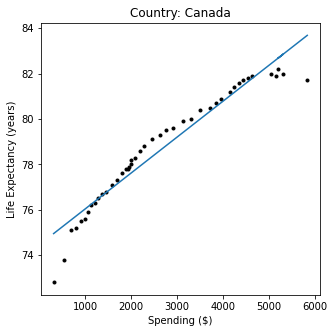

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X, y, '.k')
plt.plot(X, lin_model.predict(X))
plt.xlabel('Spending ($)')
plt.ylabel('Life Expectancy (years)')
plt.title('Country: Canada')

We can easily get the parameters of the model in the following way:

In [ ]:
print('The parameters of the model y=ax+b are')
print(f'a={lin_model.coef_[0]}')
print(f'b={lin_model.intercept_}')

The parameters of the model y=ax+b are
a=0.0015828050279988568
b=74.45575471973685


How we can use the model? Suppose that given the data we want to estimate how much will be the Life expectancy for the Spendings of $1000$? The answer is we plug $x=1000$ into the model that we trained on the data and get the predicted answer

In [ ]:
def get_prediction(model, x):
    return model.coef_[0] * x + model.intercept_

print(f'The Life expectancy for x=1000 is {get_prediction(lin_model, 1000)}')
print(f'The Life expectancy for x=20000 is {get_prediction(lin_model, 20000)}')

The Life expectancy for x=1000 is 76.0385597477357
The Life expectancy for x=20000 is 106.11185527971398


For $1000$ the prediction is good. However, the model predicts that for $20000$, Life expectancy will be 139 years (!) - it's improssible. What is the exaplnation? The answer is: extrapolation is very dangerous


## Risidual analysis: how good is our fit?

First of all, let's compute the MSE - *mean square error* - very important measure of goodness of fit
$$
MSE = \frac{1}{n} \sum_{i=1}^n{(y-\widehat{y})^2}
$$

Let's plot the Original values vs. the Prediction. In addition, we plot the line
$$
y=x
$$
The distances between the points of the graph to this line are the residuals. The module *sklearn* contains the sub-module *metrics* that contains the function computing the MSE:
```
from sklearn import metrics
metrics.mean_squared_error(y, y_pred)
```


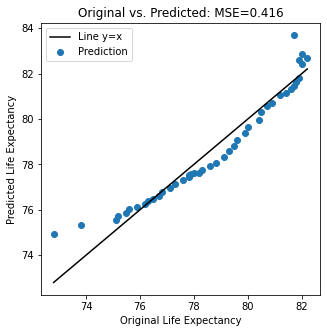

In [ ]:
from sklearn import metrics

y_pred = lin_model.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, label='Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', label='Line y=x')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title(f'Original vs. Predicted: MSE={np.round(metrics.mean_squared_error(y, y_pred), 3)}')
plt.legend()

### Excercise 1

Please produce this analysis all countries:
1) plot all scatter plots of Spending vs life expectancy at subplots
2) plot for each  the linear regression line and put in the legend the regression equation you have got
3) in the title add country name and $R^2$ and $MSE$ you have calculated


We see that the $R^2=0.93$ and the $MSE=0.416$. How good is it? To answer this quesiton we would like to plot the risiduals: the graph of errors
$$
y-\widehat{y}
$$

Text(0.5, 1.0, 'Plot of risuduals')

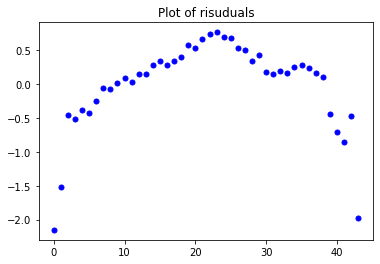

In [ ]:
plt.plot(y-y_pred, color='b', ls='-', lw='0', marker='.', markersize='10')
plt.title('Plot of risuduals')

We see that indeed, although the metrics of the regression seem good, the linear model doesn't completely describe the data. We need something else

Before we do the Polynomial regression, we show how to use the package *scipy* for the other statistical metrics of the Regression models:


## Polynomial regression

We would like to extend our simple model to quadritic model
$$
y = a x^2 + b x + c
$$

In order to use polynomial regression of order 2, we just add the square of the *Spendings* feature to our original table. We will use the following syntax of Pandas to do it
```
df['Spending_USD_Square'] = df['Spending_USD']**2
```
It creates the new column named *Spending_USD_Square*, that equals to the square of the values of the column *Spending_USD*.

Afterward, we create a new multiple linear regression using the columns *Spending_USD* and *Spending_USD_Square*


In [ ]:
df['Spending_USD_Square'] = df['Spending_USD']**2
X2 = df.loc[df.Country=='Canada', ['Spending_USD', 'Spending_USD_Square']].values
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X2, y)
print("R^2: {:.4f}".format(lin_model.score(X2, y)))

R^2: 0.9921


We observe, that indeed, the $R^2$ improved significantly. Please, note that this is not an adjusted $R^2$ - doesn't take into account the number of variables (in our case 2). To remind you, the adjusted $R^2$ is calculated according to
$$
\hat{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1},
$$
where $n$ - is the number of samples, and $p$ is the number of independent variables. Let's calculate it from the usual $R^2$:

In [ ]:
def adjusted_r_square(model, X, y):
    coefficient = (X.shape[0]-1) / (X.shape[0]-X.shape[1]-1)
    return (1 - (1-model.score(X, y)) * coefficient)

print(f'Adjusted R^2={adjusted_r_square(lin_model, X2, y)}')

Adjusted R^2=0.9917539081280501


What is the meaning of this model? It means that given Spending of $1000 a year, we can calculate the predicted Life Expectancy according to the model, even if we don't have this data at hand

Let's see what about other metrics

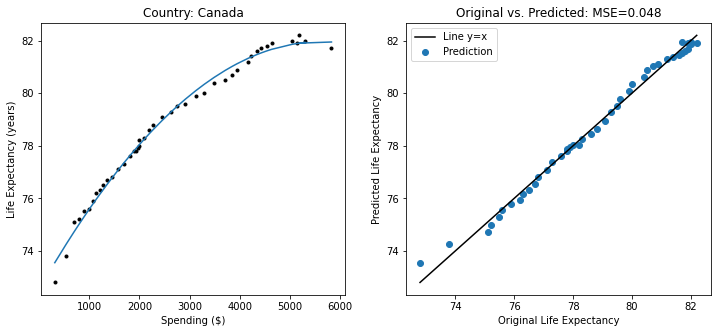

In [ ]:
y_pred = lin_model.predict(X2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(X2[:, 0], y, '.k')
ax[0].plot(X2[:, 0], lin_model.predict(X2))
ax[0].set_xlabel('Spending ($)')
ax[0].set_ylabel('Life Expectancy (years)')
ax[0].set_title('Country: Canada')

ax[1].scatter(y, y_pred, label='Prediction')
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k', label='Line y=x')
ax[1].set_xlabel('Original Life Expectancy')
ax[1].set_ylabel('Predicted Life Expectancy')
ax[1].set_title(f'Original vs. Predicted: MSE={np.round(metrics.mean_squared_error(y, y_pred), 3)}')
ax[1].legend()

We see that co,paring to the Linear regression, our Polynomial regression of order 2 gets improves the MSE significantly - order of magnitude. What about the risiduals?

Text(0.5, 1.0, 'Plot of risuduals')

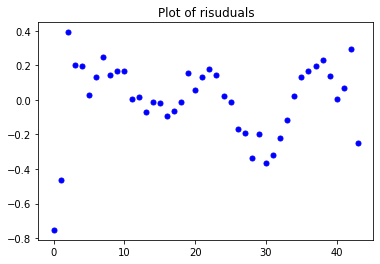

In [ ]:
plt.plot(y-y_pred, color='b', ls='-', lw='0', marker='.', markersize='10')
plt.title('Plot of risuduals')

Indeed, the risiduals also behave now much more randomly than for the Linear regression

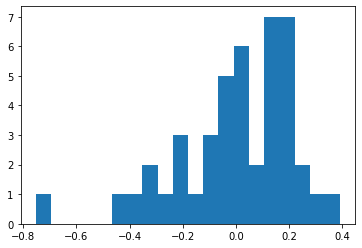

In [ ]:
plt.hist(y-y_pred, bins=20)
plt.show()

### Excercise 3

Please, perform the same analysis for Japan : Life expectancy as the function of Healthcare spendings. Compare linear regression model to polynomial regression model of order 2



# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)